In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
f_2014 = ['uber-raw-data-apr14.csv','uber-raw-data-may14.csv','uber-raw-data-jun14.csv','uber-raw-data-jul14.csv','uber-raw-data-aug14.csv','uber-raw-data-sep14.csv']
df_2014=[]
for i in f_2014:
    df_2014.append(pd.read_csv(i, encoding='Iso-8859-1'))
df_2014[0].head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [234]:
f_2015 = ['uber-raw-data-janjune-15.csv']
df_2015=[]
for i in f_2015:
    df_2015.append(pd.read_csv(i, encoding='Iso-8859-1'))
df_2015[0].head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [235]:
f_fhv = ['other-American_B01362.csv','other-Diplo_B01196.csv','other-Highclass_B01717.csv','other-Skyline_B00111.csv','other-Carmel_B00256.csv','other-Federal_02216.csv','other-Lyft_B02510.csv','other-Dial7_B00887.csv','other-Firstclass_B01536.csv','other-Prestige_B01338.csv']
df_fhv=[]
for i in f_fhv:
    df_fhv.append(pd.read_csv(i, encoding='Iso-8859-1'))
df_fhv[0].head(5)

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN


In [236]:
f_agg = ['other-FHV-services_jan-aug-2015.csv', 'Uber-Jan-Feb-FOIL.csv']
df_agg=[]
for i in f_agg:
    df_agg.append(pd.read_csv(i, encoding='Iso-8859-1'))
df_agg[0].head(5)

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [238]:
size_2014=[]
for i in range(len(f_2014)):
    print(f_2014[i])
    print(df_2014[i].size)
    size_2014.append(df_2014[i].size)
print(size_2014)

uber-raw-data-apr14.csv
2258064
uber-raw-data-aug14.csv
3317100
uber-raw-data-jul14.csv
3184484
uber-raw-data-jun14.csv
2655376
uber-raw-data-may14.csv
2609740
uber-raw-data-sep14.csv
4112544
[2258064, 3317100, 3184484, 2655376, 2609740, 4112544]


In [31]:
import re
for i in df_2014:
    h = []
    d = []
    dnt = i['Date/Time'].values
    for j in dnt:
        res = re.split('/| |:', j)
        h.append(res[3])
        d.append(res[1])
    i['Day'] = d
    i['Hour'] = h


In [32]:
df_2014[0]

,Date/Time,Lat,Lon,Base,Day,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1,0
...,...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,30,23
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,30,23
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,30,23
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,30,23


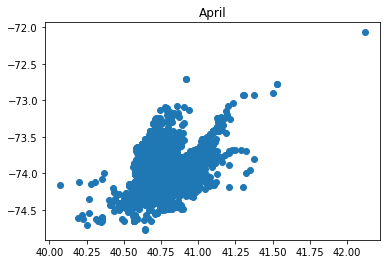

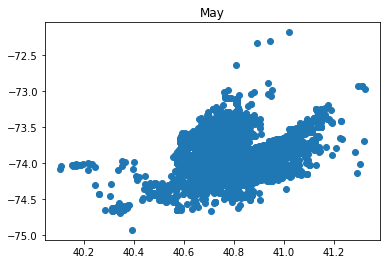

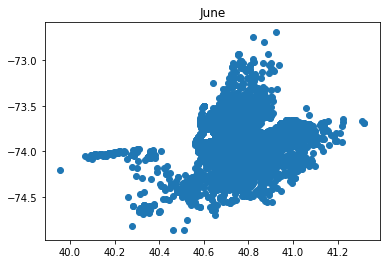

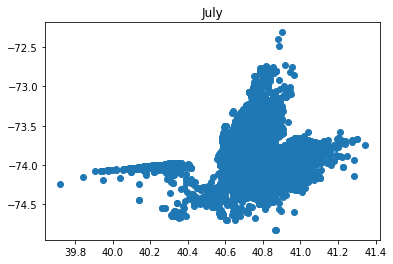

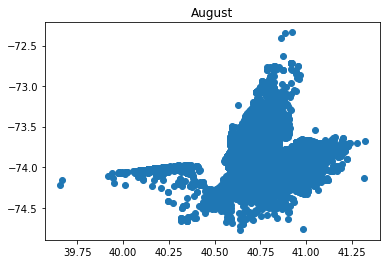

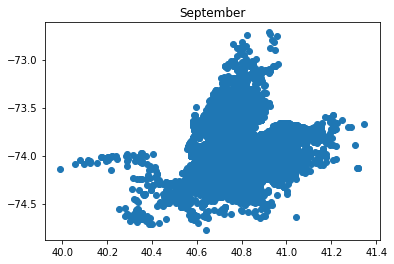

In [47]:
#fig, ax = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
month = ['April', 'May', 'June', 'July', 'August', 'September']
for i in range(len(df_2014)):
    lat = df_2014[i]['Lat'].values
    lon = df_2014[i]['Lon'].values
    plt.scatter(lat, lon)
    plt.title(month[i])
    plt.show()